```
=================================================
FINAL PROJECT

Nama        : Astari Aprilia, Jonathan Edward Tasek, Salsabila Tjahya Kusuma Putri, Dian Aprilia Krismonita
Batch       : HCK-022
Objective   : Menganalisis data pembatalan customer salon


=================================================
```

___

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [4]:
df = pd.read_csv('final_dataa.csv')
df

,Cancel Date,Client code,Service,Service Price,Staff,Booking Date,Canceled By,Cancel Description,Days
0,2023-09-19,CUST788,HAIR STYLING,25,Sarah Wilson,2023-09-18,Amit Patel,Double-booked,1
1,2023-12-06,CUST367,PEDICURE,30,Priya Sharma,2023-12-04,Li Wei,Rescheduled,2
2,2023-05-22,CUST363,SPA TREATMENT,55,Priya Sharma,2023-05-18,Amit Patel,Staff unavailable,4
3,2023-10-12,CUST265,WAXING,40,Sarah Wilson,2023-10-07,Priya Sharma,Staff unavailable,5
4,2023-09-27,CUST645,MASSAGE,35,John Doe,2023-09-20,Michael Brown,Double-booked,7
...,...,...,...,...,...,...,...,...,...
1510,2023-12-06,CUST1713,HAIR STYLING,41,John Doe,2023-11-30,Yuki Tanaka,Staff unavailable,6
1511,2023-12-12,CUST1714,PEDICURE,68,Priya Sharma,2023-12-05,Amit Patel,Staff unavailable,7
1512,2023-12-18,CUST1715,MANICURE,20,Sarah Wilson,2023-12-10,Li Wei,Staff unavailable,8
1513,2023-12-24,CUST1716,PEDICURE,69,Kunal Joshi,2023-12-15,Emily Clark,Staff unavailable,9


<mark>**Insight:**</mark> Dataset ini berisi 1515 baris yang terdiri dari bulan Januari hingga Desember 2023

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cancel Date         1515 non-null   object
 1   Client code         1515 non-null   object
 2   Service             1515 non-null   object
 3   Service Price       1515 non-null   int64 
 4   Staff               1515 non-null   object
 5   Booking Date        1515 non-null   object
 6   Canceled By         1515 non-null   object
 7   Cancel Description  1515 non-null   object
 8   Days                1515 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 106.6+ KB


In [6]:
# Mengonversi kolom 'date_str' ke datetime
df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Cancel Date'] = pd.to_datetime(df['Cancel Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cancel Date         1515 non-null   datetime64[ns]
 1   Client code         1515 non-null   object        
 2   Service             1515 non-null   object        
 3   Service Price       1515 non-null   int64         
 4   Staff               1515 non-null   object        
 5   Booking Date        1515 non-null   datetime64[ns]
 6   Canceled By         1515 non-null   object        
 7   Cancel Description  1515 non-null   object        
 8   Days                1515 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 106.6+ KB


Kolom `Cancel Date` dan `Booking Date` telah disesuaikan tipe datanya.

# Latar Belakang

Pembatalan layanan oleh pelanggan dapat berdampak signifikan pada efisiensi operasional dan pendapatan perusahaan. Oleh karena itu, analisis menyeluruh diperlukan untuk memahami alasan pembatalan, tren waktu terjadinya pembatalan, dan layanan apa saja yang paling sering dibatalkan. Visualisasi ini bertujuan untuk mengidentifikasi pola yang terjadi sehingga dapat diambil langkah-langkah mitigasi yang lebih efektif.

# Exploration Data Analysis

## Pie Chart > Proporsi Alasan Pembatalan

> Untuk memahami penyebab utama pembatalan, kita terlebih dahulu melihat proporsi alasan pembatalan yang dilaporkan oleh pelanggan.

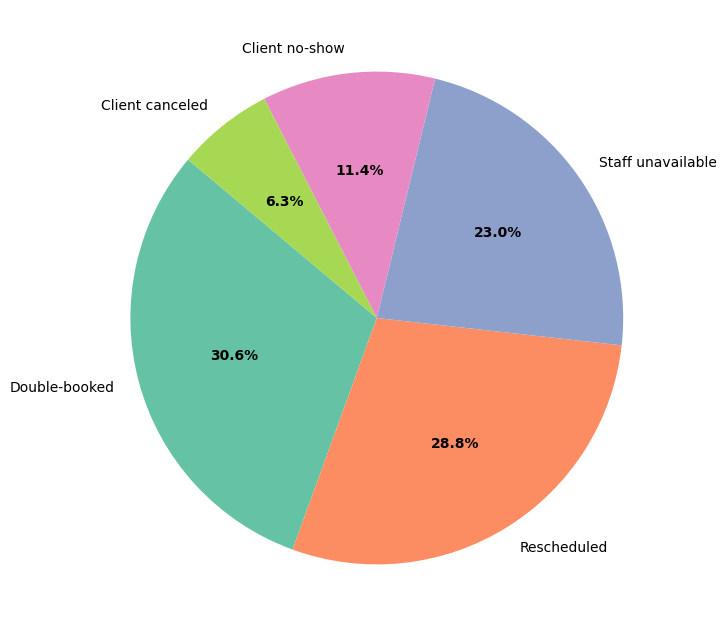

In [7]:
cancel_description_counts = df['Cancel Description'].value_counts()
from matplotlib.colors import ListedColormap

# Using the 'tab20c' colormap
tab20c_colors = plt.get_cmap('Set2').colors[:len(cancel_description_counts)]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(cancel_description_counts, 
                                   labels=cancel_description_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=tab20c_colors)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# plt.title('Proporsi Alasan Pembatalan', fontweight='bold')
plt.show()


Banyak salon masih menggunakan metode manual dalam mengelola jadwal janji temu. Hal ini sering menyebabkan kebingungan, _double-booking_, atau kesalahan dalam penjadwalan.

Chart di atas menunjukkan bahwa alasan pembatalan didominasi oleh _double-booked_, _rescheduled_, dan _staff unavailable_. Oleh karena itu, perlu pengembangan sistem manajemen janji temu untuk meminimalisir kendala operasional yang menyebabkan pembatalan.

## Line Chart > Jumlah Pembatalan per Bulan

> Setelah mengetahui penyebab dominan pembatalan, kita lanjutkan dengan **melihat tren pembatalan** dari waktu ke waktu untuk memahami kapan lonjakan pembatalan biasanya terjadi.

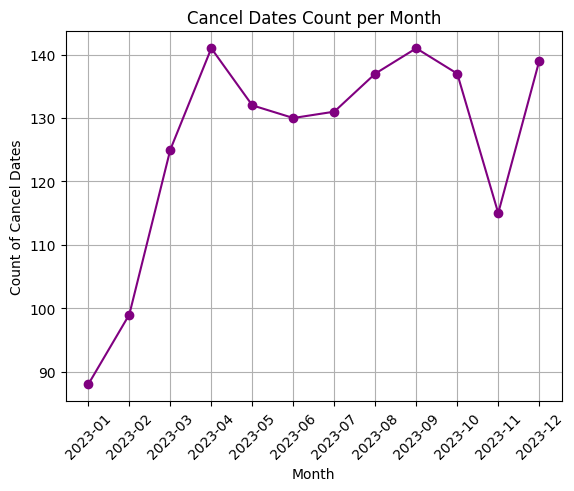

In [9]:
# Grupkan data berdasarkan bulan dan hitung jumlahnya
df['Month'] = df['Cancel Date'].dt.to_period('M')
counts_per_month = df['Month'].value_counts().sort_index()

# Buat line chart
plt.plot(counts_per_month.index.astype(str), counts_per_month.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Month')
plt.ylabel('Count of Cancel Dates')
plt.title('Cancel Dates Count per Month')
plt.grid(True)
# Putar label sumbu x sebesar 45 derajat
plt.xticks(rotation=45)
plt.show()


Grafik menunjukkan pola pembatalan yang fluktuatif sepanjang tahun 2023, dengan puncak di bulan April dan September, penurunan tajam di Oktober, dan kenaikan kembali di akhir tahun.

## Bar Chart > Top 5 Layanan dengan Pembatalan Terbanyak

> Setelah mengetahui kapan lonjakan pembatalan terjadi, penting juga untuk melihat layanan apa saja yang paling sering dibatalkan oleh pelanggan agar mitigasi bisa lebih tepat sasaran.

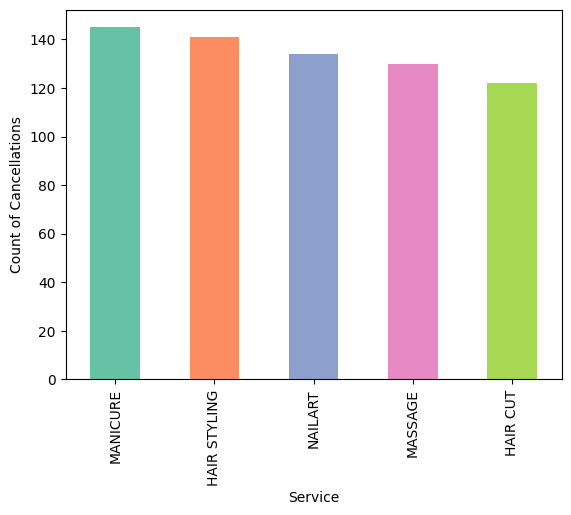

In [12]:
# Hitung jumlah pembatalan per layanan dan ambil top 5
cancel_counts = df['Service'].value_counts().head(5)

# Pilih palet warna dari matplotlib (Set2 digunakan sebagai contoh)
colors = plt.get_cmap('Set2').colors[:len(cancel_counts)]

# Buat barchart dengan warna yang ditentukan
cancel_counts.plot(kind='bar', color=colors)
plt.xlabel('Service')
plt.ylabel('Count of Cancellations')
# plt.title('Top 5 Cancellations by Service')
plt.show()

Grafik menunjukkan 5 layanan dengan jumlah pembatalan tertinggi oleh customer, yaitu _Manicure_, _Hair Styling_, _Nail Art_, _Massage_, dan _Hair Cut_, dengan _Manicure_ sebagai layanan yang paling sering dibatalkan.

# Rekomendasi

1. Implementasi sistem manajemen janji temu yang lebih baik untuk mencegah _double-booking_.
2. Lakukan analisis lebih lanjut terhadap bulan dengan puncak pembatalan untuk mengidentifikasi faktor penyebab spesifik.
3. Optimalkan ketersediaan staf terutama untuk layanan prioritas seperti *Manicure* dan *Hair Styling*.